# car price prediction 

## step 1
import all necessary libraries
<br>
load the data set
<br>
check info
<br>
check dataset statistics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
car_df = pd.read_csv('data/car_price_dataset.csv')
car_df.head(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [12]:
car_df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


**NOW** we need to know how many unique values does each categorical columns contains **OR** how many unique values of non-numerical data we have in our dataset. so that we can figure out how to change these non-numerical values to numerical value 

In [14]:
categorical_columns = car_df.select_dtypes(include='object')
categorical_columns.head(5) 

,Brand,Model,Fuel_Type,Transmission
0,Kia,Rio,Diesel,Manual
1,Chevrolet,Malibu,Hybrid,Automatic
2,Mercedes,GLA,Diesel,Automatic
3,Audi,Q5,Electric,Manual
4,Volkswagen,Golf,Hybrid,Semi-Automatic


In [16]:
unique_values = {col : categorical_columns[col].nunique() for col in categorical_columns}

In [19]:
for col, count in unique_values.items():
    print (f'{col}: has {count} unique values')

Brand: has 10 unique values
Model: has 30 unique values
Fuel_Type: has 4 unique values
Transmission: has 3 unique values


## outlier 
now we will use box plot for all inputs (here we need to make box plot for price and mileage only) 

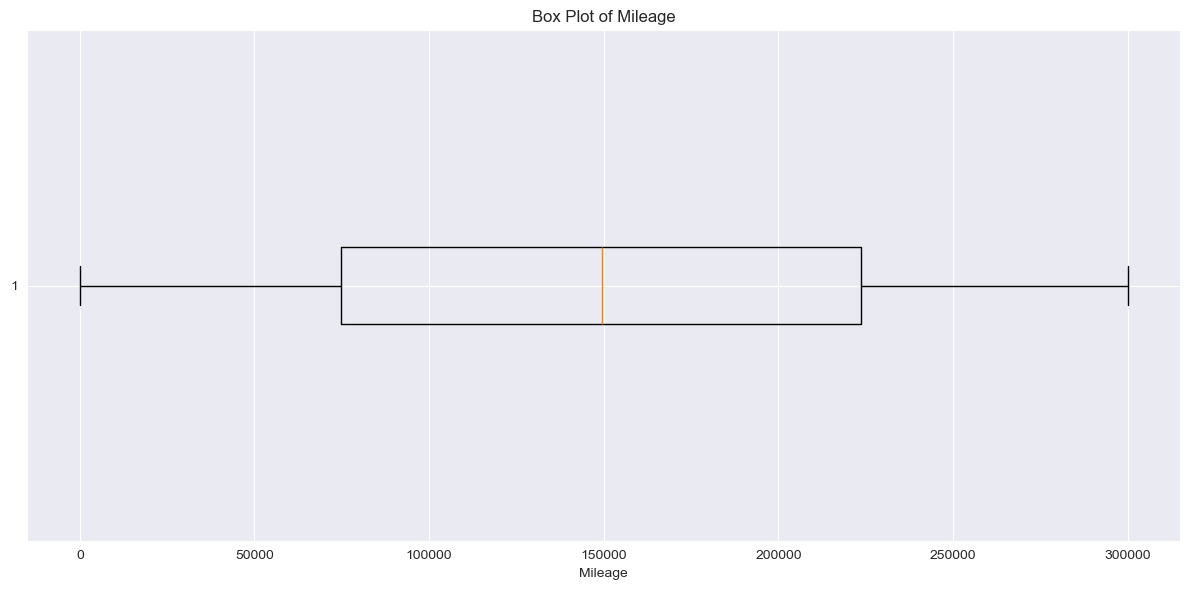

In [22]:
plt.figure(figsize=(12,6))
plt.boxplot(car_df['Mileage'], vert=False)
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')
plt.tight_layout()
plt.show()

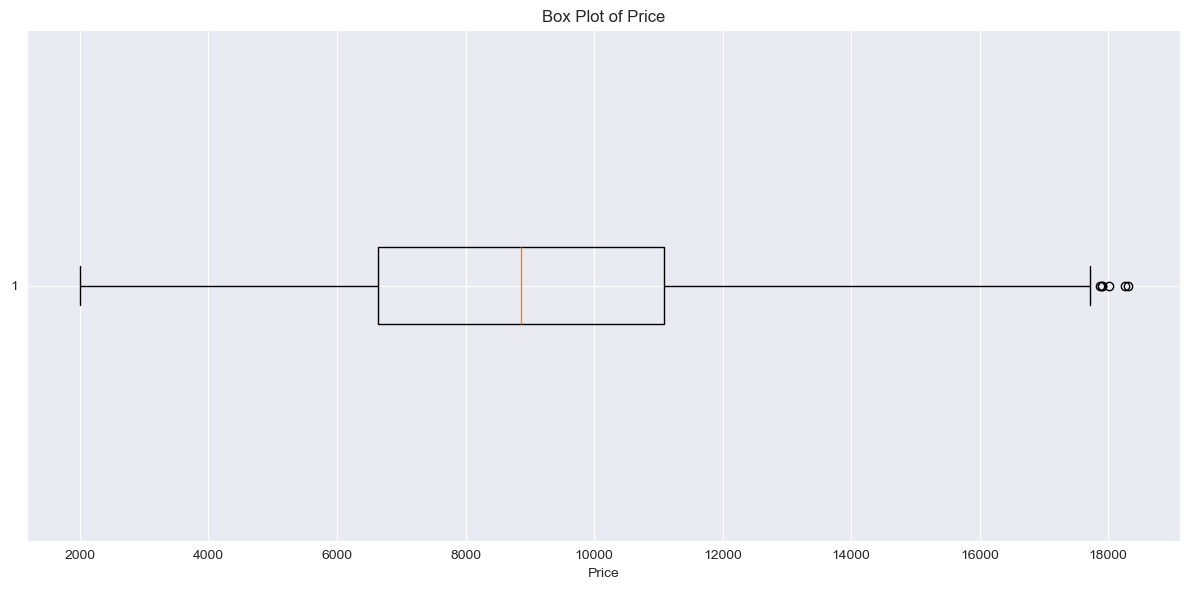

In [23]:
plt.figure(figsize=(12,6))
plt.boxplot(car_df['Price'], vert=False)
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

In [25]:
Q1 = car_df[['Mileage', 'Price']].quantile(0.25)   #first quartile
Q2 = car_df[['Mileage', 'Price']].quantile(0.75)   #third quartile
IQR = Q2 - Q1   #interquartile range

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

In [30]:
outliers = ((car_df[['Mileage', 'Price']] < lower_bound) | (car_df[['Mileage', 'Price']] > upper_bound)).sum()
outliers

Mileage    0
Price      6
dtype: int64

In [31]:
cleanedCarDf = car_df[(car_df['Price'] >= lower_bound['Price']) & (car_df['Price'] <= upper_bound['Price'])]

In [32]:
cleanedCarDf.shape

(9994, 10)